In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [8]:
games = pd.read_csv('/kaggle/input/mlcourse/video_games_sales.csv')

In [9]:
games.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
games.shape

(16719, 16)

<Axes: >

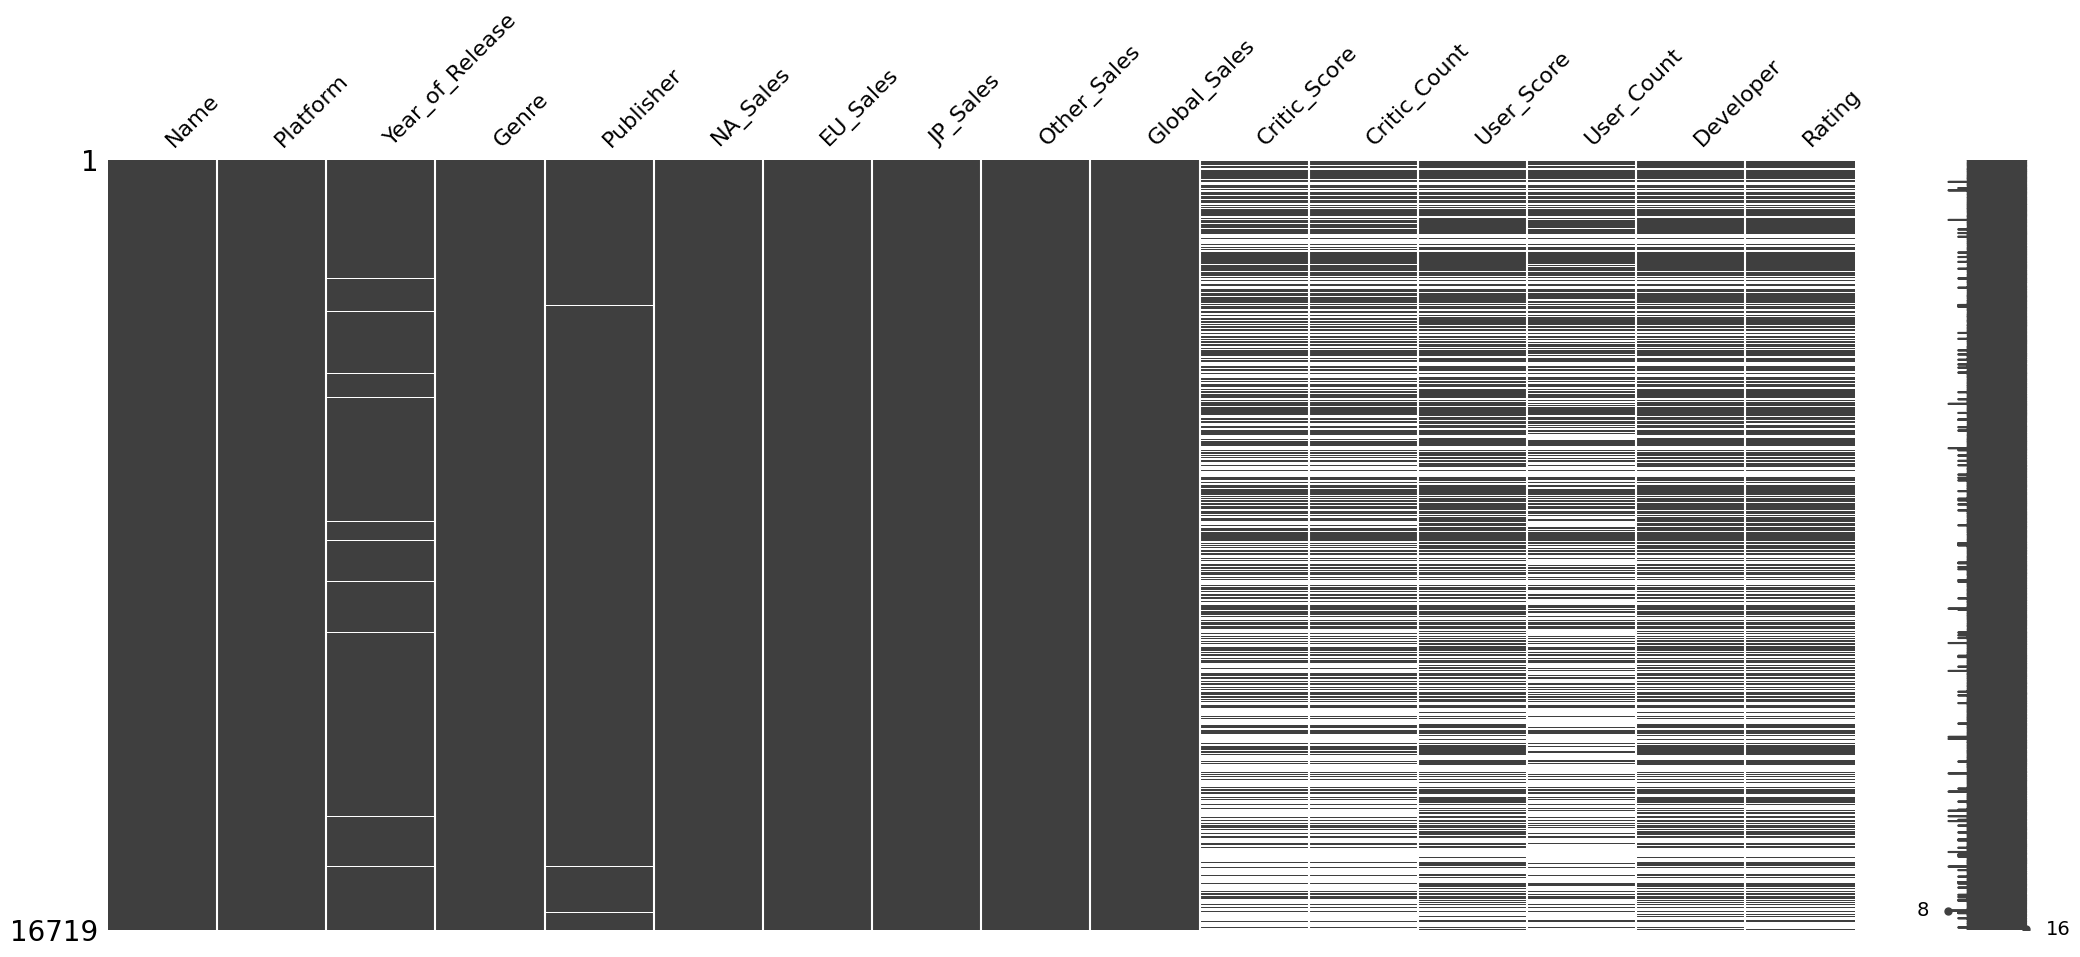

In [11]:
import missingno as msno
msno.matrix(games)

In [12]:
games.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [14]:
games= games[games['Rating'].notna()]
games.isnull().sum()

Name                  0
Platform              0
Year_of_Release     181
Genre                 0
Publisher             7
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       1896
Critic_Count       1896
User_Score           71
User_Count         2446
Developer             0
Rating                0
dtype: int64

In [19]:
games.shape

(9950, 16)

In [20]:
games['Year_of_Release'].value_counts()

Year_of_Release
2009.0    1011
2008.0     981
2007.0     821
2010.0     799
2005.0     706
2011.0     703
2006.0     678
2002.0     655
2003.0     613
2004.0     598
2012.0     355
2014.0     345
2001.0     339
2013.0     316
2015.0     315
2016.0     280
2000.0     148
1999.0      42
1998.0      32
1997.0      19
1996.0       7
1992.0       2
1994.0       1
2020.0       1
1985.0       1
1988.0       1
Name: count, dtype: int64

In [26]:
games['Publisher'].value_counts()

Publisher
Electronic Arts                 1139
Ubisoft                          784
Activision                       781
THQ                              532
Konami Digital Entertainment     382
                                ... 
Mercury Games                      1
Pacific Century Cyber Works        1
iWin                               1
NDA Productions                    1
Mentor Interactive                 1
Name: count, Length: 332, dtype: int64

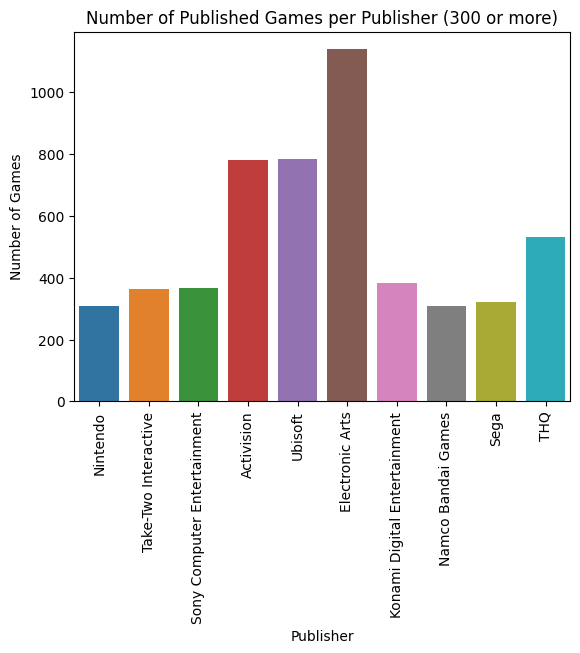

In [27]:
# Count the number of games published by each publisher
publisher_counts = games['Publisher'].value_counts()

# Filter for publishers with 300 or more published games
filtered_publishers = publisher_counts[publisher_counts >= 300]

# Create a countplot
sns.countplot(data=games[games['Publisher'].isin(filtered_publishers.index)], x='Publisher')
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.title('Number of Published Games per Publisher (300 or more)')
plt.xlabel('Publisher')
plt.ylabel('Number of Games')
plt.show()

In [29]:
# Replace missing values in 'Year_of_Release' with the most frequent value
most_frequent_year = games['Year_of_Release'].mode()[0]
games['Year_of_Release'].fillna(most_frequent_year, inplace=True)

# Replace missing values in 'Critic_Score', 'Critic_Count', 'User_Score', and 'User_Count' with the average value
columns_to_average = ['Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']
for column in columns_to_average:
    mean_value = games[column].mode()
    games[column].fillna(mean_value, inplace=True)


/tmp/ipykernel_30/2051875936.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  games['Year_of_Release'].fillna(most_frequent_year, inplace=True)
/tmp/ipykernel_30/2051875936.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace

In [32]:
games.isnull().sum()

Name                  0
Platform              0
Year_of_Release       0
Genre                 0
Publisher             7
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score          0
Critic_Count          0
User_Score           71
User_Count         2446
Developer             0
Rating                0
dtype: int64

In [41]:
games.dropna(subset=['User_Score', 'User_Count', 'Publisher'], inplace=True)

In [42]:
games.isnull().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

In [44]:
games.shape

(7499, 16)

In [46]:
games.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,7499.000000,7499.000000,7499.000000,7499.000000,7499.000000,7499.000000,7499.000000,7499.000000,7499.000000
mean,2007.661955,0.379775,0.226456,0.059457,0.080148,0.746013,70.174297,28.693508,162.777037
std,4.239402,0.930722,0.661674,0.275292,0.259980,1.885614,13.363576,18.484026,564.258013
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2004.000000,0.060000,0.020000,0.000000,0.010000,0.110000,63.000000,15.000000,10.000000
50%,2008.000000,0.150000,0.060000,0.000000,0.020000,0.280000,71.000000,26.000000,24.000000
75%,2011.000000,0.380000,0.200000,0.010000,0.070000,0.720000,80.000000,38.000000,81.000000
max,2016.000000,41.360000,28.960000,6.500000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [52]:
games.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

Preprocess Information

In [53]:
games['Platform'].value_counts()

Platform
PS2     1240
X360     958
PS3      865
PC       725
XB       585
Wii      559
DS       515
PSP      421
GC       366
GBA      255
PS4      246
XOne     176
3DS      173
PS       158
PSV      143
WiiU     100
DC        14
Name: count, dtype: int64

In [54]:
from sklearn.preprocessing import OneHotEncoder

In [55]:
games_encoded = pd.get_dummies(games, columns=['Platform', 'Genre', 'Publisher', 'Developer', 'Rating'], drop_first=True)

In [56]:
# Separate features and target variable
X = games.drop('Global_Sales', axis=1)  # Features
y = games['Global_Sales']                 # Target variable

# One-hot encode categorical features
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = pd.DataFrame(encoder.fit_transform(X[['Platform', 'Genre', 'Publisher', 'Developer', 'Rating']]))
X_encoded.columns = encoder.get_feature_names_out(['Platform', 'Genre', 'Publisher', 'Developer', 'Rating'])

# Combine encoded features with other numerical features
X = pd.concat([X.drop(['Platform', 'Genre', 'Publisher', 'Developer', 'Rating'], axis=1), X_encoded], axis=1)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [58]:
print(len(X_encoded))
print(len(y))

7499
7499


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [62]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [63]:
# Initialize the Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


In [73]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 4.1327101183406665
Mean Absolute Error: 0.6276742947564419
R^2 Score: 0.3816981449116106
